# Tackle analysis

In this notebook, we analyse games from Super Rugby Pacific to identify trends and prepare for the opposition.

## Data loading

In [2]:
import pandas as pd
import numpy as np

# We load the CSV file
df = pd.read_csv("./data/tackles_SuperRugbyPacific_2024-25.csv") 
df

,Game ID,Competition,Season,Date,Home team,Away team,Tackling team,Carrying team,Time,Phase,...,Tackle outcome,Tackle qualifier,Tackle dominance,Tackler number,Tackle area,Tackler name,Tackler position,Attacking player name,Missed tackle category,Missed tackle outcome
0,945312,Super Rugby Pacific,2025,19/04/2025,Western Force,Hurricanes,Hurricanes,Western Force,1_00007,1,...,Complete,NaN,Neutral Tackle,1st Tackler,Upper Torso,Asafo Aumua,2,Mac Grealy,NaN,NaN
1,945312,Super Rugby Pacific,2025,19/04/2025,Western Force,Hurricanes,Western Force,Hurricanes,1_00041,1,...,Complete,NaN,Neutral Tackle,1st Tackler,Legs,Bayley Kuenzle,11,Ngantungane Punivai,NaN,NaN
2,945312,Super Rugby Pacific,2025,19/04/2025,Western Force,Hurricanes,Western Force,Hurricanes,1_00041,1,...,Passive,Assist,Ineffective Tackle,2nd Tackler,Upper Torso,Nic Dolly,2,Ngantungane Punivai,NaN,NaN
3,945312,Super Rugby Pacific,2025,19/04/2025,Western Force,Hurricanes,Western Force,Hurricanes,1_00045,2,...,Complete,NaN,Neutral Tackle,1st Tackler,Legs,Vaiolini Ekuasi,8,Brad Shields,NaN,NaN
4,945312,Super Rugby Pacific,2025,19/04/2025,Western Force,Hurricanes,Western Force,Hurricanes,1_00046,2,...,Complete,Assist,Neutral Tackle,2nd Tackler,Lower Torso,Carlo Tizzano,7,Brad Shields,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31939,945284,Super Rugby Pacific,2025,14/03/2025,Highlanders,Hurricanes,Hurricanes,Highlanders,2_08121,15,...,Complete,Assist,Neutral Tackle,2nd Tackler,Upper Torso,Asafo Aumua,2,Timoci Tavatavanawai,NaN,NaN
31940,945284,Super Rugby Pacific,2025,14/03/2025,Highlanders,Hurricanes,Hurricanes,Highlanders,2_08128,16,...,Complete,NaN,Neutral Tackle,1st Tackler,Upper Torso,Brayden Iose,6,Soane Vikena,NaN,NaN
31941,945284,Super Rugby Pacific,2025,14/03/2025,Highlanders,Hurricanes,Hurricanes,Highlanders,2_08134,17,...,Passive,NaN,Ineffective Tackle,1st Tackler,Lower Torso,Du'Plessis Kirifi,7,Will Stodart,NaN,NaN
31942,945284,Super Rugby Pacific,2025,14/03/2025,Highlanders,Hurricanes,Hurricanes,Highlanders,2_08142,18,...,Complete,NaN,Neutral Tackle,1st Tackler,Legs,Pouri Rakete-Stones,1,Soane Vikena,NaN,NaN


## Overall stats

In [4]:
# Count occurrences of each 'Tackle outcome' overall
outcome_counts_overall = df['Tackle outcome'].value_counts()

# Calculate percentages
outcome_percentages_overall = (outcome_counts_overall / outcome_counts_overall.sum()) * 100

# Print results
print("Overall Tackle Outcome Distribution:")
for outcome in outcome_counts_overall.index:
    print(f"{outcome}\t{outcome_counts_overall[outcome]}\t{outcome_percentages_overall[outcome]:.1f}%")


Overall Tackle Outcome Distribution:
Complete	16316	51.1%
Passive	7307	22.9%
Missed	3715	11.6%
Offload Allowed	1887	5.9%
Sack	1339	4.2%
Ineffective	556	1.7%
Turnover Won	359	1.1%
Pen Conceded	244	0.8%
Try Saver	117	0.4%
Forced in Touch	104	0.3%


In [5]:
df_first = df[df["Tackler number"] == "1st Tackler"]

# Count occurrences of each 'Tackle outcome' overall
outcome_counts_overall = df_first['Tackle outcome'].value_counts()

# Calculate percentages
outcome_percentages_overall = (outcome_counts_overall / outcome_counts_overall.sum()) * 100

# Print results
print("Overall Tackle Outcome Distribution:")
for outcome in outcome_counts_overall.index:
    print(f"{outcome}\t{outcome_counts_overall[outcome]}\t{outcome_percentages_overall[outcome]:.1f}%")


Overall Tackle Outcome Distribution:
Complete	8961	47.5%
Passive	4100	21.7%
Missed	2990	15.8%
Offload Allowed	1274	6.7%
Sack	848	4.5%
Ineffective	256	1.4%
Turnover Won	201	1.1%
Pen Conceded	140	0.7%
Forced in Touch	67	0.4%
Try Saver	46	0.2%


## Team summaries

### When the team is tackling

#### Outcomes

In [7]:
# Count occurrences of each outcome per team
outcome_counts = df.groupby(['Tackling team', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Show results team by team
for team in outcome_counts.index:
    print(f"Team: {team}")
    team_data = pd.DataFrame({
        'Count': outcome_counts.loc[team].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[team]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in team_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: ACT Brumbies
Complete	1468	49.4%
Passive	716	24.1%
Missed	391	13.2%
Offload Allowed	206	6.9%
Sack	84	2.8%
Turnover Won	38	1.3%
Ineffective	28	0.9%
Pen Conceded	18	0.6%
Try Saver	15	0.5%
Forced in Touch	6	0.2%
------------------------------
Team: Blues
Complete	1765	57.2%
Passive	637	20.6%
Missed	318	10.3%
Offload Allowed	124	4.0%
Sack	123	4.0%
Turnover Won	38	1.2%
Pen Conceded	35	1.1%
Ineffective	31	1.0%
Forced in Touch	15	0.5%
Try Saver	2	0.1%
------------------------------
Team: Chiefs
Complete	1572	51.1%
Passive	736	23.9%
Missed	329	10.7%
Offload Allowed	168	5.5%
Sack	147	4.8%
Ineffective	49	1.6%
Turnover Won	31	1.0%
Pen Conceded	23	0.7%
Try Saver	11	0.4%
Forced in Touch	8	0.3%
------------------------------
Team: Crusaders
Complete	2106	55.6%
Passive	720	19.0%
Missed	400	10.6%
Offload Allowed	240	6.3%
Sack	168	4.4%
Ineffective	63	1.7%
Turnover Won	39	1.0%
Pen Conceded	32	0.8%
Try Saver	12	0.3%
Forced in Touch	7	0.2%
------------------------------
Team: Fijian Drua
Complete	88

#### Outcomes for 1st tacklers

In [9]:
# Count occurrences of each outcome per team
outcome_counts = df_first.groupby(['Tackling team', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Show results team by team
for team in outcome_counts.index:
    print(f"Team: {team}")
    team_data = pd.DataFrame({
        'Count': outcome_counts.loc[team].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[team]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in team_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: ACT Brumbies
Complete	791	45.3%
Passive	408	23.4%
Missed	307	17.6%
Offload Allowed	125	7.2%
Sack	55	3.2%
Turnover Won	25	1.4%
Ineffective	13	0.7%
Pen Conceded	11	0.6%
Try Saver	6	0.3%
Forced in Touch	4	0.2%
------------------------------
Team: Blues
Complete	981	53.9%
Passive	361	19.8%
Missed	257	14.1%
Offload Allowed	80	4.4%
Sack	74	4.1%
Turnover Won	21	1.2%
Pen Conceded	20	1.1%
Ineffective	16	0.9%
Forced in Touch	9	0.5%
Try Saver	1	0.1%
------------------------------
Team: Chiefs
Complete	877	48.1%
Passive	416	22.8%
Missed	274	15.0%
Offload Allowed	109	6.0%
Sack	93	5.1%
Ineffective	18	1.0%
Pen Conceded	14	0.8%
Turnover Won	14	0.8%
Forced in Touch	5	0.3%
Try Saver	3	0.2%
------------------------------
Team: Crusaders
Complete	1154	51.9%
Passive	411	18.5%
Missed	320	14.4%
Offload Allowed	149	6.7%
Sack	115	5.2%
Ineffective	27	1.2%
Turnover Won	21	0.9%
Pen Conceded	16	0.7%
Forced in Touch	5	0.2%
Try Saver	5	0.2%
------------------------------
Team: Fijian Drua
Complete	523	41.3%
Pa

#### Tackle height

In [11]:
# Count occurrences of each 'Tackle area' overall
area_counts_overall = df['Tackle area'].value_counts()

# Calculate percentages
area_percentages_overall = (area_counts_overall / area_counts_overall.sum()) * 100

# Print results
print("Overall Tackle Area Distribution:")
for area in area_counts_overall.index:
    print(f"{area}\t{area_counts_overall[area]}\t{area_percentages_overall[area]:.1f}%")


Overall Tackle Area Distribution:
Upper Torso	15037	49.4%
Legs	8374	27.5%
Lower Torso	7038	23.1%


In [12]:
# Count occurrences of each height per team
area_counts = df.groupby(['Tackling team', 'Tackle area']).size().unstack(fill_value=0)

# Calculate percentages
area_percentages = area_counts.div(area_counts.sum(axis=1), axis=0) * 100

# Show results team by team
for team in area_counts.index:
    print(f"Team: {team}")
    team_data = pd.DataFrame({
        'Count': area_counts.loc[team].astype(int),  # Ensure count is integer
        'Percentage': area_percentages.loc[team]
    }).sort_values(by='Count', ascending=False)

    for area, row in team_data.iterrows():
        print(f"{area}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: ACT Brumbies
Upper Torso	1525	54.1%
Legs	733	26.0%
Lower Torso	563	20.0%
------------------------------
Team: Blues
Upper Torso	1478	49.9%
Lower Torso	746	25.2%
Legs	739	24.9%
------------------------------
Team: Chiefs
Upper Torso	1484	50.1%
Legs	827	27.9%
Lower Torso	651	22.0%
------------------------------
Team: Crusaders
Upper Torso	1587	43.7%
Legs	1109	30.5%
Lower Torso	939	25.8%
------------------------------
Team: Fijian Drua
Upper Torso	911	47.7%
Lower Torso	507	26.5%
Legs	492	25.8%
------------------------------
Team: Highlanders
Upper Torso	1142	43.8%
Legs	777	29.8%
Lower Torso	688	26.4%
------------------------------
Team: Hurricanes
Upper Torso	1231	45.4%
Legs	844	31.1%
Lower Torso	637	23.5%
------------------------------
Team: Moana Pasifika
Upper Torso	1068	44.1%
Legs	739	30.5%
Lower Torso	615	25.4%
------------------------------
Team: NSW Waratahs
Upper Torso	1292	49.9%
Legs	800	30.9%
Lower Torso	496	19.2%
------------------------------
Team: Queensland Reds
Upper 

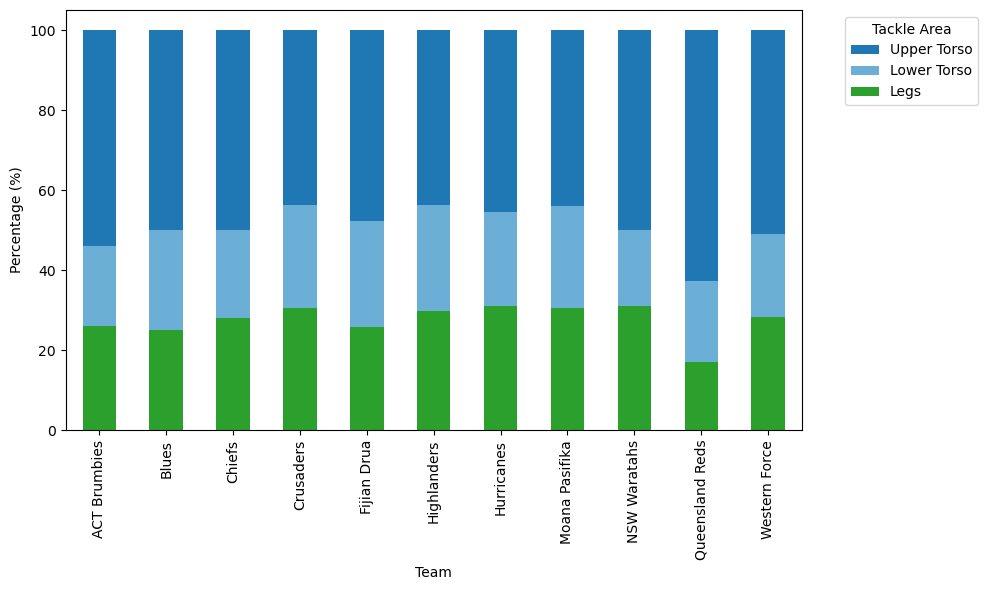

In [13]:
import matplotlib.pyplot as plt

# Define the plot stacking order (bottom to top)
stack_order = ['Legs', 'Lower Torso', 'Upper Torso']

# Define the legend display order
legend_order = ['Upper Torso', 'Lower Torso', 'Legs']

# Define custom colors
colors = {
    'Upper Torso': '#1f77b4',  # Dark blue
    'Lower Torso': '#6baed6',  # Light blue
    'Legs': '#2ca02c'          # Green
}

# Plot using the stacking order
ax = area_percentages[stack_order].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[colors[area] for area in stack_order]
)

plt.xlabel('Team')
plt.ylabel('Percentage (%)')

# Manually set legend in the desired order
handles, labels = ax.get_legend_handles_labels()
legend_dict = dict(zip(labels, handles))

ax.legend(
    [legend_dict[area] for area in legend_order], 
    legend_order, 
    title='Tackle Area',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.savefig(f"./figures/Tackle Height.png", bbox_inches='tight')
plt.show()

#### Tackle height for 1st tacklers

In [15]:
df_first = df[df["Tackler number"] == "1st Tackler"]

# Count occurrences of each 'Tackle area' overall
area_counts_overall = df_first['Tackle area'].value_counts()

# Calculate percentages
area_percentages_overall = (area_counts_overall / area_counts_overall.sum()) * 100

# Print results
print("Overall Tackle Area Distribution:")
for area in area_counts_overall.index:
    print(f"{area}\t{area_counts_overall[area]}\t{area_percentages_overall[area]:.1f}%")


Overall Tackle Area Distribution:
Upper Torso	7442	42.1%
Legs	6160	34.8%
Lower Torso	4089	23.1%


In [16]:
# Count occurrences of each height per team
area_counts = df_first.groupby(['Tackling team', 'Tackle area']).size().unstack(fill_value=0)

# Calculate percentages
area_percentages = area_counts.div(area_counts.sum(axis=1), axis=0) * 100

# Show results team by team
for team in area_counts.index:
    print(f"Team: {team}")
    team_data = pd.DataFrame({
        'Count': area_counts.loc[team].astype(int),  # Ensure count is integer
        'Percentage': area_percentages.loc[team]
    }).sort_values(by='Count', ascending=False)

    for area, row in team_data.iterrows():
        print(f"{area}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: ACT Brumbies
Upper Torso	765	47.1%
Legs	526	32.4%
Lower Torso	332	20.5%
------------------------------
Team: Blues
Upper Torso	764	44.4%
Legs	522	30.3%
Lower Torso	435	25.3%
------------------------------
Team: Chiefs
Upper Torso	737	42.5%
Legs	607	35.0%
Lower Torso	391	22.5%
------------------------------
Team: Crusaders
Legs	820	39.1%
Upper Torso	774	36.9%
Lower Torso	503	24.0%
------------------------------
Team: Fijian Drua
Upper Torso	458	39.4%
Legs	381	32.8%
Lower Torso	323	27.8%
------------------------------
Team: Highlanders
Upper Torso	586	38.2%
Legs	562	36.7%
Lower Torso	385	25.1%
------------------------------
Team: Hurricanes
Legs	631	39.0%
Upper Torso	603	37.3%
Lower Torso	383	23.7%
------------------------------
Team: Moana Pasifika
Legs	559	39.1%
Upper Torso	531	37.1%
Lower Torso	341	23.8%
------------------------------
Team: NSW Waratahs
Upper Torso	624	40.5%
Legs	601	39.0%
Lower Torso	315	20.5%
------------------------------
Team: Queensland Reds
Upper Torso	918

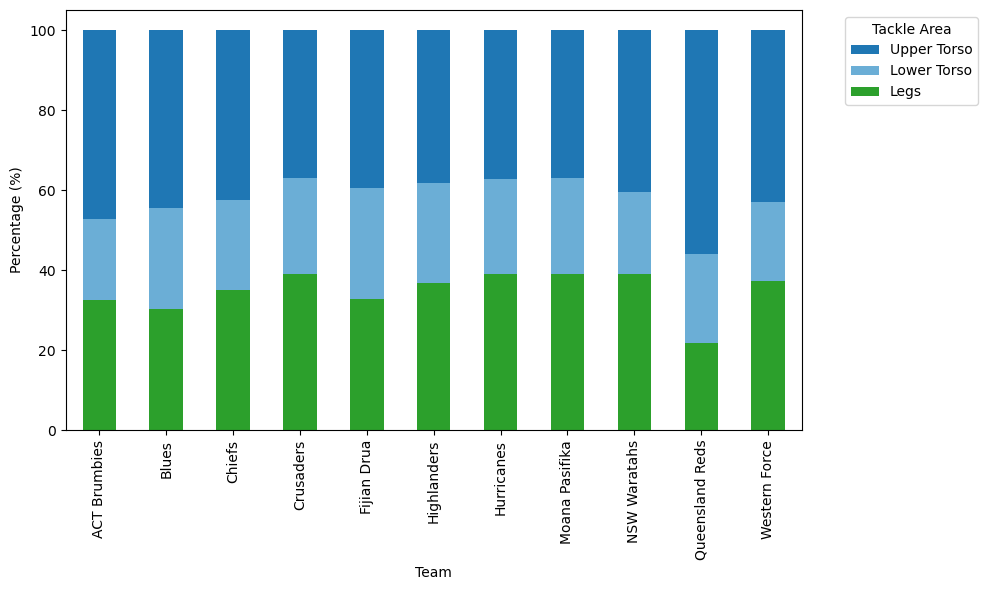

In [17]:
import matplotlib.pyplot as plt

# Define the plot stacking order (bottom to top)
stack_order = ['Legs', 'Lower Torso', 'Upper Torso']

# Define the legend display order
legend_order = ['Upper Torso', 'Lower Torso', 'Legs']

# Define custom colors
colors = {
    'Upper Torso': '#1f77b4',  # Dark blue
    'Lower Torso': '#6baed6',  # Light blue
    'Legs': '#2ca02c'          # Green
}

# Plot using the stacking order
ax = area_percentages[stack_order].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[colors[area] for area in stack_order]
)

plt.xlabel('Team')
plt.ylabel('Percentage (%)')

# Manually set legend in the desired order
handles, labels = ax.get_legend_handles_labels()
legend_dict = dict(zip(labels, handles))

ax.legend(
    [legend_dict[area] for area in legend_order], 
    legend_order, 
    title='Tackle Area',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.savefig(f"./figures/Tackle Height - 1st tacklers.png", bbox_inches='tight')
plt.show()

### When the team is carrying (i.e., being tackled)

In [19]:
# Count occurrences of each outcome per team
outcome_counts = df.groupby(['Carrying team', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Show results team by team
for team in outcome_counts.index:
    print(f"Team: {team}")
    team_data = pd.DataFrame({
        'Count': outcome_counts.loc[team].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[team]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in team_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: ACT Brumbies
Complete	1833	54.9%
Passive	774	23.2%
Missed	315	9.4%
Offload Allowed	131	3.9%
Sack	125	3.7%
Ineffective	70	2.1%
Turnover Won	40	1.2%
Pen Conceded	25	0.7%
Try Saver	19	0.6%
Forced in Touch	9	0.3%
------------------------------
Team: Blues
Complete	1716	54.2%
Passive	703	22.2%
Missed	316	10.0%
Offload Allowed	162	5.1%
Sack	146	4.6%
Ineffective	61	1.9%
Pen Conceded	29	0.9%
Turnover Won	16	0.5%
Try Saver	11	0.3%
Forced in Touch	8	0.3%
------------------------------
Team: Chiefs
Complete	1703	50.2%
Passive	765	22.6%
Missed	405	11.9%
Offload Allowed	215	6.3%
Sack	137	4.0%
Ineffective	68	2.0%
Turnover Won	37	1.1%
Pen Conceded	32	0.9%
Forced in Touch	14	0.4%
Try Saver	14	0.4%
------------------------------
Team: Crusaders
Complete	1628	53.7%
Passive	575	19.0%
Missed	369	12.2%
Offload Allowed	187	6.2%
Sack	138	4.5%
Ineffective	58	1.9%
Turnover Won	34	1.1%
Pen Conceded	16	0.5%
Try Saver	16	0.5%
Forced in Touch	13	0.4%
------------------------------
Team: Fijian Drua
Complete	

## Team-specific defence analysis



In [21]:
selected_team = 'Queensland Reds'

# Filter for the selected team
df_team = df[df['Tackling team'] == selected_team]

### Players missing tackles

In [23]:
# Count occurrences of each outcome per player
outcome_counts = df_team.groupby(['Tackler name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of 'Missed' tackles (descending), defaulting to 0% if 'Missed' is not present
sorted_players = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).sort_values(ascending=False).index

# Show results player by player
print(f"Team: {selected_team}")
for player in sorted_players:
    print(f"Player: {player}")
    player_data = pd.DataFrame({
        'Count': outcome_counts.loc[player].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[player]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in player_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: Queensland Reds
Player: Connor Vest
Complete	2	28.6%
Missed	2	28.6%
Passive	2	28.6%
Offload Allowed	1	14.3%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Pen Conceded	0	0.0%
Sack	0	0.0%
Try Saver	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Heremaia Murray
Passive	12	33.3%
Missed	9	25.0%
Complete	6	16.7%
Ineffective	3	8.3%
Offload Allowed	3	8.3%
Forced in Touch	1	2.8%
Sack	1	2.8%
Turnover Won	1	2.8%
Pen Conceded	0	0.0%
Try Saver	0	0.0%
------------------------------
Player: Filipo Daugunu
Complete	28	28.3%
Passive	26	26.3%
Missed	22	22.2%
Offload Allowed	9	9.1%
Sack	9	9.1%
Ineffective	2	2.0%
Turnover Won	2	2.0%
Pen Conceded	1	1.0%
Forced in Touch	0	0.0%
Try Saver	0	0.0%
------------------------------
Player: Tom Lynagh
Passive	33	34.4%
Complete	29	30.2%
Missed	18	18.8%
Offload Allowed	7	7.3%
Ineffective	2	2.1%
Try Saver	2	2.1%
Turnover Won	2	2.1%
Forced in Touch	1	1.0%
Pen Conceded	1	1.0%
Sack	1	1.0%
------------------------------
Player: Hunter Paisami
Complete	

### 1st tacklers

In [25]:
# Count occurrences of each tackle number per player
number_counts = df_team.groupby(['Tackler name', 'Tackler number']).size().unstack(fill_value=0)

# Calculate percentages
number_percentages = number_counts.div(number_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of 'First' tackles (descending), defaulting to 0% if 'First' is not present
sorted_players = number_percentages.get('1st Tackler', pd.Series(0, index=number_percentages.index)).sort_values(ascending=False).index

# Show results player by player, if they have made more than 20 tackles
print(f"Team: {selected_team}")
for player in sorted_players:

    total_tackles = number_counts.loc[player].sum()
    if total_tackles <= 20:
        continue  # Skip players with 20 or fewer tackles

    print(f"Player: {player}")
    player_data = pd.DataFrame({
        'Count': number_counts.loc[player].astype(int),  # Ensure count is integer
        'Percentage': number_percentages.loc[player]
    }).sort_values(by='Count', ascending=False)

    for number, row in player_data.iterrows():
        print(f"{number}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: Queensland Reds
Player: Filipo Daugunu
1st Tackler	70	70.7%
2nd Tackler	27	27.3%
3rd Tackler	1	1.0%
4th Tackler	1	1.0%
5th+ Tackler	0	0.0%
------------------------------
Player: Tom Lynagh
1st Tackler	67	69.8%
2nd Tackler	23	24.0%
3rd Tackler	5	5.2%
4th Tackler	1	1.0%
5th+ Tackler	0	0.0%
------------------------------
Player: Massimo De Lutiis
1st Tackler	40	67.8%
2nd Tackler	17	28.8%
3rd Tackler	2	3.4%
4th Tackler	0	0.0%
5th+ Tackler	0	0.0%
------------------------------
Player: George Blake
1st Tackler	21	67.7%
2nd Tackler	9	29.0%
3rd Tackler	1	3.2%
4th Tackler	0	0.0%
5th+ Tackler	0	0.0%
------------------------------
Player: Zane Nonggorr
1st Tackler	103	66.9%
2nd Tackler	47	30.5%
3rd Tackler	4	2.6%
4th Tackler	0	0.0%
5th+ Tackler	0	0.0%
------------------------------
Player: Tim Ryan
1st Tackler	80	66.7%
2nd Tackler	33	27.5%
3rd Tackler	6	5.0%
4th Tackler	1	0.8%
5th+ Tackler	0	0.0%
------------------------------
Player: Lachie Anderson
1st Tackler	76	66.7%
2nd Tackler	32	28.1

#### 1st tacklers missing tackles

In [27]:
df_first = df_team[df_team["Tackler number"] == "1st Tackler"]

# Count occurrences of each outcome per player
outcome_counts = df_first.groupby(['Tackler name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of 'Missed' tackles (descending), defaulting to 0% if 'Missed' is not present
sorted_players = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).sort_values(ascending=False).index

# Show results player by player
print(f"Team: {selected_team}")
for player in sorted_players:
    print(f"Player: {player}")
    player_data = pd.DataFrame({
        'Count': outcome_counts.loc[player].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[player]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in player_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: Queensland Reds
Player: Heremaia Murray
Missed	8	34.8%
Passive	6	26.1%
Complete	3	13.0%
Offload Allowed	3	13.0%
Forced in Touch	1	4.3%
Ineffective	1	4.3%
Sack	1	4.3%
Pen Conceded	0	0.0%
Try Saver	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Connor Vest
Missed	2	33.3%
Passive	2	33.3%
Complete	1	16.7%
Offload Allowed	1	16.7%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Pen Conceded	0	0.0%
Sack	0	0.0%
Try Saver	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Filipo Daugunu
Missed	20	28.6%
Complete	18	25.7%
Passive	14	20.0%
Sack	8	11.4%
Offload Allowed	7	10.0%
Ineffective	1	1.4%
Pen Conceded	1	1.4%
Turnover Won	1	1.4%
Forced in Touch	0	0.0%
Try Saver	0	0.0%
------------------------------
Player: Hunter Paisami
Complete	17	32.7%
Missed	13	25.0%
Passive	12	23.1%
Sack	5	9.6%
Offload Allowed	2	3.8%
Pen Conceded	2	3.8%
Turnover Won	1	1.9%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Try Saver	0	0.0%
------------------------------
Player: George Blake
Compl

### Players with dominant tackles

In [29]:
# Filter for the selected team
df_team = df[df['Tackling team'] == selected_team]

# Count occurrences of each outcome per player
outcome_counts = df_team.groupby(['Tackler name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of 'Missed' tackles (descending), defaulting to 0% if 'Missed' is not present
sorted_players = outcome_percentages.get('Sack', pd.Series(0, index=outcome_percentages.index)).sort_values(ascending=False).index

# Show results player by player
print(f"Team: {selected_team}")
for player in sorted_players:
    print(f"Player: {player}")
    player_data = pd.DataFrame({
        'Count': outcome_counts.loc[player].astype(int),  # Ensure count is integer
        'Percentage': outcome_percentages.loc[player]
    }).sort_values(by='Count', ascending=False)

    for outcome, row in player_data.iterrows():
        print(f"{outcome}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

    print("-" * 30)

Team: Queensland Reds
Player: Nick Bloomfield
Complete	1	33.3%
Passive	1	33.3%
Sack	1	33.3%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Missed	0	0.0%
Offload Allowed	0	0.0%
Pen Conceded	0	0.0%
Try Saver	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Filipo Daugunu
Complete	28	28.3%
Passive	26	26.3%
Missed	22	22.2%
Offload Allowed	9	9.1%
Sack	9	9.1%
Ineffective	2	2.0%
Turnover Won	2	2.0%
Pen Conceded	1	1.0%
Forced in Touch	0	0.0%
Try Saver	0	0.0%
------------------------------
Player: Jeff Toomaga-Allen
Complete	31	68.9%
Passive	7	15.6%
Sack	4	8.9%
Missed	1	2.2%
Offload Allowed	1	2.2%
Try Saver	1	2.2%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Pen Conceded	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Josh Nasser
Complete	30	53.6%
Passive	13	23.2%
Missed	8	14.3%
Sack	3	5.4%
Offload Allowed	2	3.6%
Forced in Touch	0	0.0%
Ineffective	0	0.0%
Pen Conceded	0	0.0%
Try Saver	0	0.0%
Turnover Won	0	0.0%
------------------------------
Player: Josh Canham
Complet

### Type of missed tackles

In [31]:
# Filter for the selected team
df_team = df[df['Tackling team'] == selected_team]

# Filter for missed tackles
df_missed = df_team.dropna(subset=['Missed tackle category'], inplace=False)

In [32]:
# Count occurrences of each tackle outcome per player
outcome_counts = df_team.groupby(['Tackler name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Extract only missed tackles for analysis
df_missed = df_team[df_team['Tackle outcome'] == 'Missed']

# Count occurrences of each missed tackle category per player
missed_category_counts = df_missed.groupby(['Tackler name', 'Missed tackle category']).size().unstack(fill_value=0)

# Calculate percentages for missed tackle categories
missed_category_percentages = missed_category_counts.div(missed_category_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of missed tackles (descending), defaulting to 0% if no missed tackles
sorted_players = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).sort_values(ascending=False).index

# Show results player by player in sorted order
print(f"Team: {selected_team}")
for player in sorted_players:
    total_missed = outcome_counts.get('Missed', pd.Series(0, index=outcome_counts.index)).loc[player]  # Total missed tackles
    missed_percentage = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).loc[player]  # Percentage of missed tackles

    if total_missed > 0:
        print(f"Player: {player} - Missed tackles: {total_missed} ({missed_percentage:.1f}%)")
        player_missed_data = pd.DataFrame({
            'Count': missed_category_counts.loc[player].astype(int),
            'Percentage': missed_category_percentages.loc[player]
        }).sort_values(by='Count', ascending=False)

        for category, row in player_missed_data.iterrows():
            print(f"{category}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

        print("-" * 30)


Team: Queensland Reds
Player: Connor Vest - Missed tackles: 2 (28.6%)
Bumped Off	1	50.0%
Stepped	1	50.0%
Outpaced	0	0.0%
Positional	0	0.0%
------------------------------
Player: Heremaia Murray - Missed tackles: 9 (25.0%)
Bumped Off	4	44.4%
Stepped	4	44.4%
Outpaced	1	11.1%
Positional	0	0.0%
------------------------------
Player: Filipo Daugunu - Missed tackles: 22 (22.2%)
Bumped Off	11	50.0%
Stepped	8	36.4%
Positional	3	13.6%
Outpaced	0	0.0%
------------------------------
Player: Tom Lynagh - Missed tackles: 18 (18.8%)
Bumped Off	12	66.7%
Stepped	6	33.3%
Outpaced	0	0.0%
Positional	0	0.0%
------------------------------
Player: Hunter Paisami - Missed tackles: 17 (17.9%)
Bumped Off	12	70.6%
Stepped	5	29.4%
Outpaced	0	0.0%
Positional	0	0.0%
------------------------------
Player: George Blake - Missed tackles: 5 (16.1%)
Bumped Off	5	100.0%
Outpaced	0	0.0%
Positional	0	0.0%
Stepped	0	0.0%
------------------------------
Player: Tim Ryan - Missed tackles: 19 (15.8%)
Bumped Off	11	57.9%
Steppe

## Team-specific attack analysis

### Players evading tackles

In [34]:
# Filter for the selected team
df_team = df[df['Carrying team'] == selected_team]

# Filter for missed tackles
df_missed = df_team.dropna(subset=['Missed tackle category'], inplace=False)

In [35]:
# Count occurrences of each tackle outcome per player
outcome_counts = df_team.groupby(['Attacking player name', 'Tackle outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Extract only missed tackles for analysis
df_missed = df_team[df_team['Tackle outcome'] == 'Missed']

# Count occurrences of each missed tackle category per player
missed_category_counts = df_missed.groupby(['Attacking player name', 'Missed tackle category']).size().unstack(fill_value=0)

# Calculate percentages for missed tackle categories
missed_category_percentages = missed_category_counts.div(missed_category_counts.sum(axis=1), axis=0) * 100

# Sort players by percentage of missed tackles (descending), defaulting to 0% if no missed tackles
sorted_players = outcome_counts.get('Missed', pd.Series(0, index=outcome_counts.index)).sort_values(ascending=False).index

# Show results player by player in sorted order
print(f"Team: {selected_team}")
for player in sorted_players:
    total_missed = outcome_counts.get('Missed', pd.Series(0, index=outcome_counts.index)).loc[player]  # Total missed tackles
    missed_percentage = outcome_percentages.get('Missed', pd.Series(0, index=outcome_percentages.index)).loc[player]  # Percentage of missed tackles

    if total_missed > 0:
        print(f"Player: {player} - Evaded tackles: {total_missed} ({missed_percentage:.1f}%)")
        player_missed_data = pd.DataFrame({
            'Count': missed_category_counts.loc[player].astype(int),
            'Percentage': missed_category_percentages.loc[player]
        }).sort_values(by='Count', ascending=False)

        for category, row in player_missed_data.iterrows():
            print(f"{category}\t{int(row['Count'])}\t{row['Percentage']:.1f}%")

        print("-" * 30)


Team: Queensland Reds
Player: Tate McDermott - Evaded tackles: 37 (33.9%)
Bumped Off	22	59.5%
Stepped	10	27.0%
Positional	4	10.8%
Outpaced	1	2.7%
------------------------------
Player: Filipo Daugunu - Evaded tackles: 24 (13.7%)
Bumped Off	13	54.2%
Stepped	6	25.0%
Positional	4	16.7%
Outpaced	1	4.2%
------------------------------
Player: Joe Brial - Evaded tackles: 21 (14.3%)
Bumped Off	16	76.2%
Stepped	4	19.0%
Positional	1	4.8%
Outpaced	0	0.0%
------------------------------
Player: Hunter Paisami - Evaded tackles: 21 (12.6%)
Bumped Off	15	71.4%
Positional	3	14.3%
Stepped	2	9.5%
Outpaced	1	4.8%
------------------------------
Player: Lachie Anderson - Evaded tackles: 19 (16.0%)
Bumped Off	9	47.4%
Stepped	6	31.6%
Outpaced	2	10.5%
Positional	2	10.5%
------------------------------
Player: Harry McLaughlin-Phillips - Evaded tackles: 19 (27.5%)
Bumped Off	10	52.6%
Stepped	5	26.3%
Outpaced	2	10.5%
Positional	2	10.5%
------------------------------
Player: Dre Pakeho - Evaded tackles: 18 (15.9%)

### Players offloading the ball

In [37]:
# Count occurrences of "Offload Allowed" per player
offload_counts = df_team[df_team['Tackle outcome'] == 'Offload Allowed'].groupby('Attacking player name').size()

# Calculate total tackles per player to compute percentages
total_tackles_per_player = df_team.groupby('Attacking player name').size()

# Compute percentage of "Offload Allowed" tackles for each player
offload_percentage = (offload_counts / total_tackles_per_player * 100).fillna(0)

# Create a sorted list of players based on "Offload Allowed" count (descending)
sorted_offload_players = offload_counts.sort_values(ascending=False).index

# Print the results
print(f"Players sorted by 'Offload Allowed' (Team: {selected_team})")
for player in sorted_offload_players:
    print(f"{player}\t{offload_counts[player]}\t{offload_percentage[player]:.1f}%")


Players sorted by 'Offload Allowed' (Team: Queensland Reds)
Josh Canham	23	14.7%
Seru Uru	17	14.8%
Filipo Daugunu	16	9.1%
Tate McDermott	13	11.9%
Tim Ryan	13	14.6%
Lachie Anderson	13	10.9%
Harry Wilson	13	6.8%
Hunter Paisami	8	4.8%
Tom Lynagh	7	10.1%
Kalani Thomas	7	15.9%
Ryan Smith	7	5.5%
Harry McLaughlin-Phillips	6	8.7%
Fraser McReight	6	3.8%
Richie Asiata	6	4.2%
Jock Campbell	6	6.8%
Angus Blyth	5	9.4%
Lukhan Salakaia-Loto	5	5.2%
Joe Brial	4	2.7%
Jeff Toomaga-Allen	3	4.8%
Heremaia Murray	3	4.7%
Dre Pakeho	3	2.7%
Matt Faessler	3	8.1%
John Bryant	2	3.5%
Liam Wright	1	9.1%
Frankie Goldsbrough	1	33.3%
Alex Hodgman	1	2.5%


## Visualisation

In [39]:
viz_team = selected_team
viz_season = 2025

df_viz = df[(df['Season'] == viz_season) & (df['Tackling team'] == viz_team)]
df_viz

,Game ID,Competition,Season,Date,Home team,Away team,Tackling team,Carrying team,Time,Phase,...,Tackle outcome,Tackle qualifier,Tackle dominance,Tackler number,Tackle area,Tackler name,Tackler position,Attacking player name,Missed tackle category,Missed tackle outcome
1654,946941,Super Rugby Pacific,2025,06/06/2025,Crusaders,Queensland Reds,Queensland Reds,Crusaders,1_00005,1,...,Passive,NaN,Ineffective Tackle,1st Tackler,Legs,Jock Campbell,15,Christian Lio-Willie,NaN,NaN
1655,946941,Super Rugby Pacific,2025,06/06/2025,Crusaders,Queensland Reds,Queensland Reds,Crusaders,1_00013,2,...,Complete,NaN,Neutral Tackle,1st Tackler,Upper Torso,Ryan Smith,5,Codie Taylor,NaN,NaN
1656,946941,Super Rugby Pacific,2025,06/06/2025,Crusaders,Queensland Reds,Queensland Reds,Crusaders,1_00013,2,...,Complete,Assist,Neutral Tackle,2nd Tackler,Lower Torso,Richie Asiata,2,Codie Taylor,NaN,NaN
1657,946941,Super Rugby Pacific,2025,06/06/2025,Crusaders,Queensland Reds,Queensland Reds,Crusaders,1_00035,3,...,Passive,NaN,Ineffective Tackle,1st Tackler,Lower Torso,Zane Nonggorr,3,Noah Hotham,NaN,NaN
1658,946941,Super Rugby Pacific,2025,06/06/2025,Crusaders,Queensland Reds,Queensland Reds,Crusaders,1_00053,1,...,Missed,NaN,Ineffective Tackle,1st Tackler,Lower Torso,Filipo Daugunu,11,Will Jordan,Bumped Off,Tackled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31031,945288,Super Rugby Pacific,2025,15/03/2025,Queensland Reds,NSW Waratahs,Queensland Reds,NSW Waratahs,2_08249,2,...,Sack,Assist,Dominant Tackle,3rd Tackler,Upper Torso,Angus Blyth,4,Felix Kalapu,NaN,NaN
31032,945288,Super Rugby Pacific,2025,15/03/2025,Queensland Reds,NSW Waratahs,Queensland Reds,NSW Waratahs,2_08301,3,...,Complete,NaN,Neutral Tackle,1st Tackler,Legs,Jeff Toomaga-Allen,3,Rob Leota,NaN,NaN
31033,945288,Super Rugby Pacific,2025,15/03/2025,Queensland Reds,NSW Waratahs,Queensland Reds,NSW Waratahs,2_08301,3,...,Complete,Assist,Neutral Tackle,2nd Tackler,Upper Torso,Richie Asiata,2,Rob Leota,NaN,NaN
31034,945288,Super Rugby Pacific,2025,15/03/2025,Queensland Reds,NSW Waratahs,Queensland Reds,NSW Waratahs,2_08310,4,...,Turnover Won,NaN,Neutral Tackle,1st Tackler,Lower Torso,Harry McLaughlin-Phillips,10,Andrew Kellaway,NaN,NaN


In [40]:
class field():
    def __init__(self):
        #import the libraries and then create self variables so that all necessary imports are initialized only once
        from matplotlib.patches import Rectangle as rect
        self.plt = plt
        self.rect = rect
        
    
    def union_pitch(self, pitch_color = 'white', line_color = 'Black', poles = False, linestyle = '-', line_alpha=1):
        
        #draw the rectangle that makes up the pitch and lies behind the field lines
        ax.add_patch(self.rect((0, 0), 100, 68, fc = pitch_color, zorder=0))

        #top & bottom lines
        plt.hlines(0, 0, 100, line_color), plt.hlines(68, 0, 100, line_color)

        #ends, half, 22s
        for x in range(5):
            c = [0, 22, 50, 78, 100]
            plt.vlines(c[x], 0, 68, line_color)

        #vertical and horizontal coordinates
        vertical_lines = [(2, 8), (12, 18), (66, 60), (56, 50), (22, 29), (39, 46)]
        horizontal_lines = [(47, 53), (37, 43), (57, 63), (19, 25), (75, 81), (5, 11), (95, 89)]
        vertical_y, horizontal_y = [5, 40, 60, 95], [5, 15, 53, 63]

        #lines
        for x in range(6):
            for y in range(4):
                plt.vlines(vertical_y[y], vertical_lines[x][0], vertical_lines[x][1], line_color, linestyle, line_alpha, zorder=0)
        for x in range(7):
            for y in range(4):
                plt.hlines(horizontal_y[y], horizontal_lines[x][0], horizontal_lines[x][1], line_color, linestyle, line_alpha, zorder=0)
        
        #if poles is true draw two thick rectangles at either end of the field
        if poles is True:
                plt.vlines(0, 29, 39, line_color, '-', alpha=1, linewidth=5, zorder=0)
                plt.vlines(100, 29, 39, line_color, '-', alpha=1, linewidth=5, zorder=0)

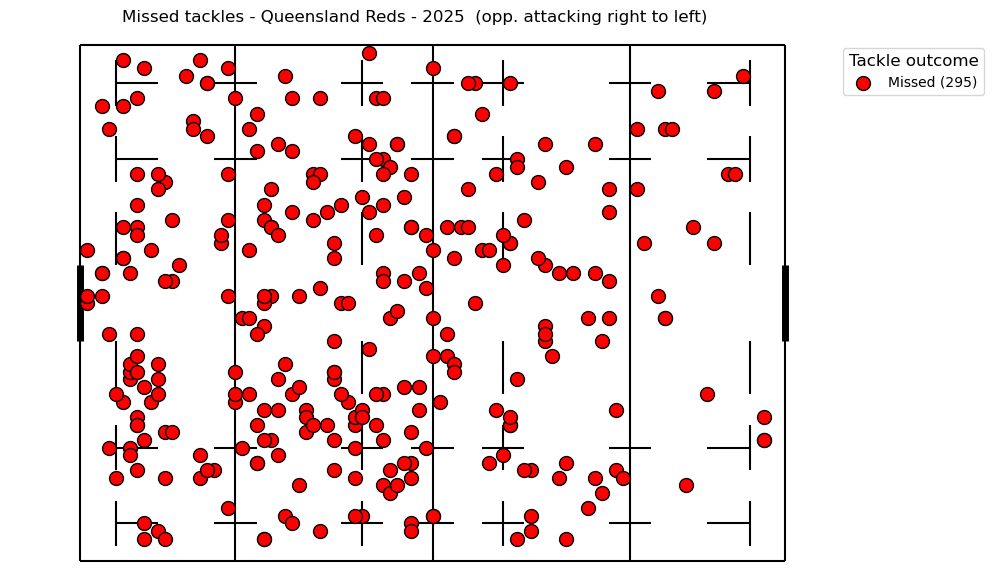

In [41]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plot=plt.figure(figsize=(12, 7))
ax=plot.add_subplot()

# Generate the pitch background
x = field()
x.union_pitch(poles=True, pitch_color='white', line_color='black')  

# Define colors and markers for different kick types
styles = {
    'Missed':      {'color': 'red',  'marker': 'o'},
    # 'Kick Line Break': {'color': 'blue',  'marker': 's'}
}

type_counts = df_viz['Tackle outcome'].value_counts()

# Plot kicks and store scatter handles for legend
scatter_handles = {}
for _, row in df_viz.iterrows():
    if row['Tackle outcome'] != 'Missed':
        continue
    style = styles.get(row['Tackle outcome'], {'color': 'white', 'marker': 'o'})  # Default style
    scatter = ax.scatter(row['x_start'], row['y_start'], color=style['color'], marker=style['marker'], s=100, edgecolors='black', zorder=2)
    if row['Tackle outcome'] not in scatter_handles:
        scatter_handles[row['Tackle outcome']] = scatter

# Create legend in the order of break_styles
legend_handles = [scatter_handles[key] for key in styles.keys() if key in scatter_handles]
legend_labels = [f'{key} ({type_counts[key]})' for key in styles.keys() if key in scatter_handles]
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.02, 0.98), loc='upper left', title='Tackle outcome', fontsize=10, title_fontsize=12)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Set limits
ax.set_xlim(-10, 105)
ax.set_ylim(-1, 70)

# Figure title
ax.set_title(f"Missed tackles - {viz_team} - {viz_season}  (opp. attacking right to left)")

# Adjust subplot to give more space on the right side for the legend
plt.subplots_adjust(right=0.8)  # Adjust the right margin to fit the legend

# Show and save plot
plt.savefig(f"./figures/{viz_team} - Defence - {viz_season} - Missed Tackle Map.png", bbox_inches='tight')
plt.show()

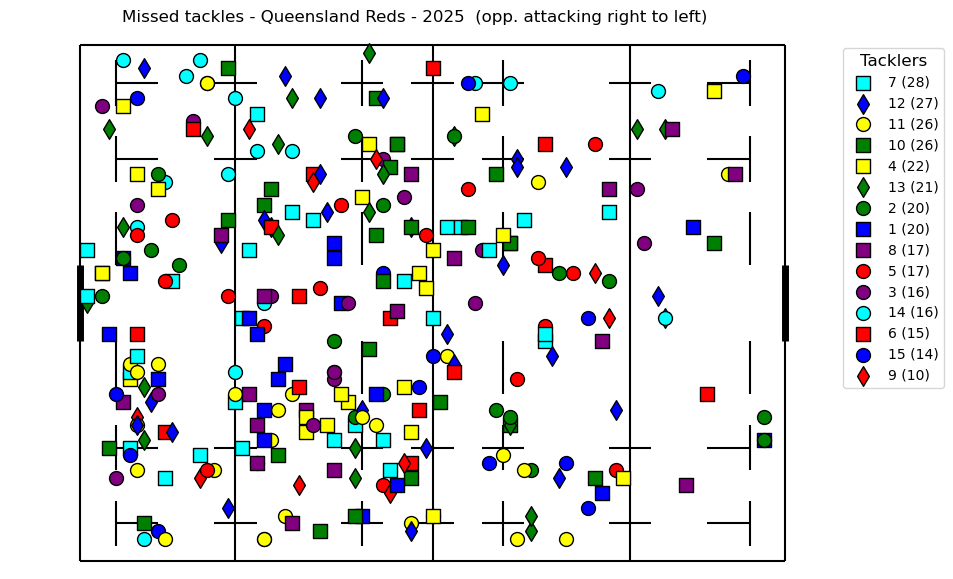

In [42]:
import itertools

plot=plt.figure(figsize=(12, 7))
ax=plot.add_subplot()

# Generate the pitch background
x = field()
x.union_pitch(poles=True, pitch_color='white', line_color='black')  

# Define a list of colors and markers for combinations
colors = ['blue', 'red', 'green', 'purple', 'yellow', 'cyan']
markers = ['o', 's', 'd', '^', 'v', '<', '>']

# Generate all combinations of colors and markers
color_marker_combinations = list(itertools.product(markers, colors))

# Generate a unique color-marker combination for each 'Kicking player'
players = df_viz['Tackler position'].unique()
styles = {
    player: {'color': color_marker_combinations[i % len(color_marker_combinations)][1], 
             'marker': color_marker_combinations[i % len(color_marker_combinations)][0]}
    for i, player in enumerate(players)
}

# Count the frequency of each tackler
player_counts = df_viz[df_viz['Tackle outcome']=='Missed']['Tackler position'].value_counts()

# Sort players by frequency (descending)
sorted_players = player_counts.index

# Plot kicks and store scatter handles for legend
scatter_handles = {}
for _, row in df_viz.iterrows():
    if row['Tackle outcome']!='Missed':
        continue
    style = styles.get(row['Tackler position'], {'color': 'white', 'marker': 'o'})  # Default style
    scatter = ax.scatter(row['x_start'], row['y_start'], color=style['color'], marker=style['marker'], s=100, edgecolors='black', zorder=2)
    if row['Tackler position'] not in scatter_handles:
        scatter_handles[row['Tackler position']] = scatter

# Create legend in the order of break_styles
legend_handles = [scatter_handles[player] for player in sorted_players if player in scatter_handles]
legend_labels = [f'{player} ({player_counts[player]})' for player in sorted_players if player in scatter_handles]

# Plot the legend
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.02, 0.98), loc='upper left', title='Tacklers', fontsize=10, title_fontsize=12)


# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Set limits
ax.set_xlim(-10, 105)
ax.set_ylim(-1, 70)

# Figure title
ax.set_title(f"Missed tackles - {viz_team} - {viz_season}  (opp. attacking right to left)")

# Adjust subplot to give more space on the right side for the legend
plt.subplots_adjust(right=0.8)  # Adjust the right margin to fit the legend

# Show and save plot
plt.savefig(f"./figures/{viz_team} - Defence - {viz_season} - Missed Tackle Map (by positions).png", bbox_inches='tight')
plt.show()

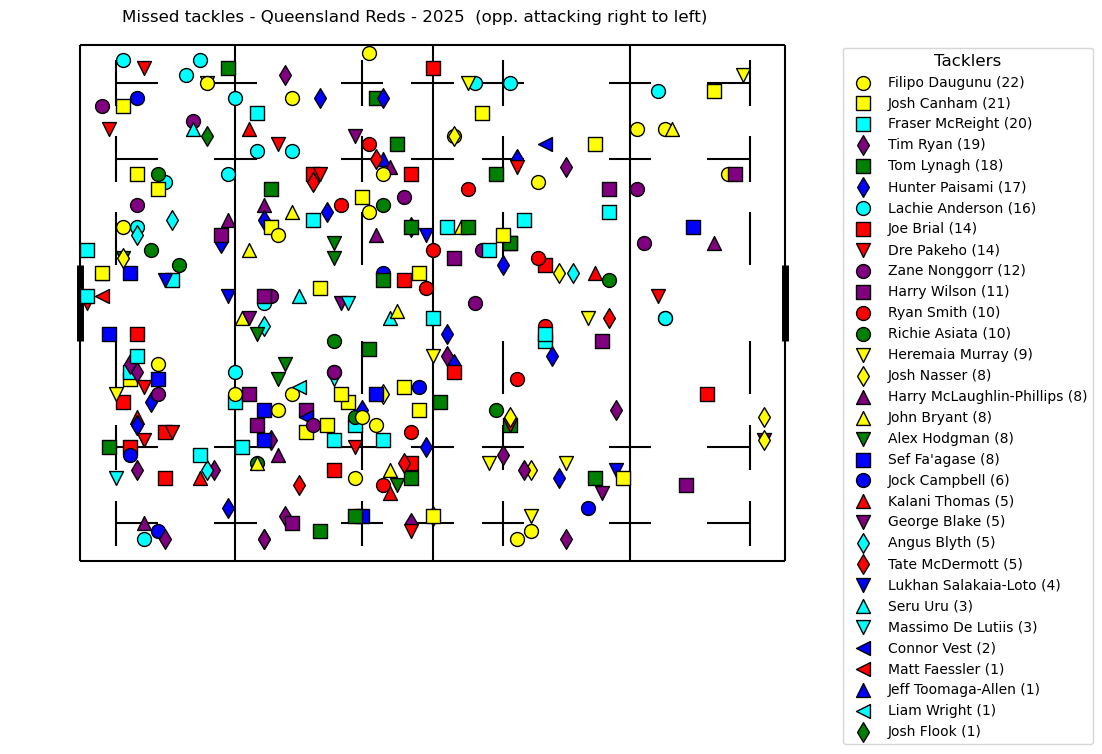

In [43]:
import itertools

plot=plt.figure(figsize=(12, 7))
ax=plot.add_subplot()

# Generate the pitch background
x = field()
x.union_pitch(poles=True, pitch_color='white', line_color='black')  

# Define a list of colors and markers for combinations
colors = ['blue', 'red', 'green', 'purple', 'yellow', 'cyan']
markers = ['o', 's', 'd', '^', 'v', '<', '>']

# Generate all combinations of colors and markers
color_marker_combinations = list(itertools.product(markers, colors))

# Generate a unique color-marker combination for each 'Kicking player'
players = df_viz['Tackler name'].unique()
styles = {
    player: {'color': color_marker_combinations[i % len(color_marker_combinations)][1], 
             'marker': color_marker_combinations[i % len(color_marker_combinations)][0]}
    for i, player in enumerate(players)
}

# Count the frequency of each tackler
player_counts = df_viz[df_viz['Tackle outcome']=='Missed']['Tackler name'].value_counts()

# Sort players by frequency (descending)
sorted_players = player_counts.index

# Plot kicks and store scatter handles for legend
scatter_handles = {}
for _, row in df_viz.iterrows():
    if row['Tackle outcome']!='Missed':
        continue
    style = styles.get(row['Tackler name'], {'color': 'white', 'marker': 'o'})  # Default style
    scatter = ax.scatter(row['x_start'], row['y_start'], color=style['color'], marker=style['marker'], s=100, edgecolors='black', zorder=2)
    if row['Tackler name'] not in scatter_handles:
        scatter_handles[row['Tackler name']] = scatter

# Create legend in the order of break_styles
legend_handles = [scatter_handles[player] for player in sorted_players if player in scatter_handles]
legend_labels = [f'{player} ({player_counts[player]})' for player in sorted_players if player in scatter_handles]

# Plot the legend
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.02, 0.98), loc='upper left', title='Tacklers', fontsize=10, title_fontsize=12)


# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Set limits
ax.set_xlim(-10, 105)
ax.set_ylim(-1, 70)

# Figure title
ax.set_title(f"Missed tackles - {viz_team} - {viz_season}  (opp. attacking right to left)")

# Adjust subplot to give more space on the right side for the legend
plt.subplots_adjust(right=0.8)  # Adjust the right margin to fit the legend

# Show and save plot
plt.savefig(f"./figures/{viz_team} - Defence - {viz_season} - Missed Tackle Map (by players).png", bbox_inches='tight')
plt.show()

Done.